**Kelvin Fung**<br>
**YSC4216 Machine Learning**<br>
**Assignment 5: Least Squares and Predictive Distribution for Regression**

Link to assignment: 

https://tanrobby.github.io/teaching/ync_machine_learning/assignment5.html

# Part 1: Least Squares 

1. Generate classification data of two classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

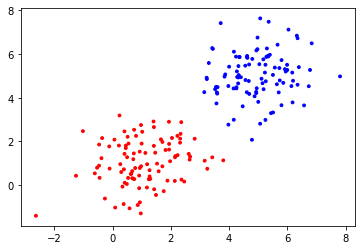

In [2]:
N1 = 100
N2 = 100
K = 2
sigma = 1.0
cov = [[sigma, 0], [0, sigma]]

mean = (1, 1)
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * N1

mean = (5, 5)
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * N2

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

# Create a NxK label matrix
T = np.matrix([[1, 0] for _ in range(N1)] + \
              [[0, 1] for _ in range(N2)])

T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
plt.show()

2. Write code to estimate W using least-squares.

In [3]:
def least_squares(X, T):
    X_dummy = np.insert(X, 0, 1, axis=1)
    W = np.linalg.inv(X_dummy.T * X_dummy) * X_dummy.T * T
    return W

In [4]:
W = least_squares(np.matrix(X), T)

3. Draw the decision line.

In [5]:
def get_decision_lines(W, x_min=-2, x_max=8):
    
    def get_y_arr(x_arr, w):
        y_arr = -(w[1]*x_arr/w[2]) - (w[0]/w[2])    
        return y_arr
    
    x_arr = np.linspace(x_min, x_max, 10)
    y_red = get_y_arr(x_arr, W[:, 0].A1)
    y_blue = get_y_arr(x_arr, W[:, 1].A1)
    
    return x_arr, y_red, y_blue

In [6]:
x_arr, y_red, y_blue = get_decision_lines(W)

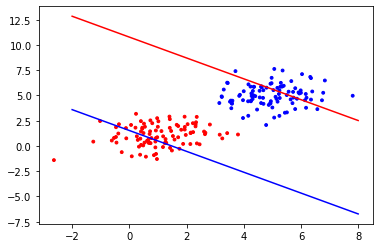

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
ax.plot(x_arr, y_red, color="red")
ax.plot(x_arr, y_blue, color="blue")

In [8]:
# Function that takes in sigma, N1, N2, t1, t2 and plots decision lines
def plot_least_squares_decision(sigma, x_min, x_max, N1=100, N2=100, t1=0, t2=1):
    K = 2
    cov = [[sigma, 0], [0, sigma]]
    
    mean = (1, 1)
    X1 = np.random.multivariate_normal(mean, cov, N1)
    c1 = ['red'] * N1

    mean = (5, 5)
    X2 = np.random.multivariate_normal(mean, cov, N2)
    c2 = ['blue'] * N2

    X = np.concatenate((X1, X2))
    color = np.concatenate((c1, c2))
    
    # Create a NxK label matrix
    T = np.matrix([[t2, t1] for _ in range(N1)] + \
                  [[t1, t2] for _ in range(N2)])
    
    # Get W 
    W = least_squares(np.matrix(X), T)
    
    # Get decision lines from W
    x_arr, y_red, y_blue = get_decision_lines(W, x_min, x_max)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
    ax.plot(x_arr, y_red, color="red")
    ax.plot(x_arr, y_blue, color="blue")

4. Change sigma to 7.0, and draw the decision line. 

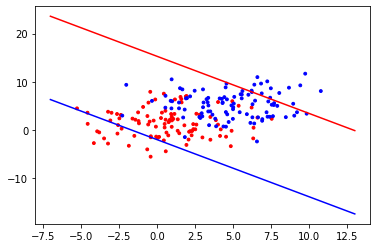

In [9]:
plot_least_squares_decision(7.0, -7, 13)

5. Discuss how the classification performance is affected by it.

With sigma=7.0, the classification performance worsened. Because the sigma is high, and the means of the two distributions are close to each other relative to their spread, there are overlaps in the two regions. The result is that there are some blue points which are very close to the blue decision line, and hence will be incorrectly classified as "red", and vice-versa for red points which are close to the red decision line.

6. Keep sigma=7.0, but now change N2=10. Draw the decision line.

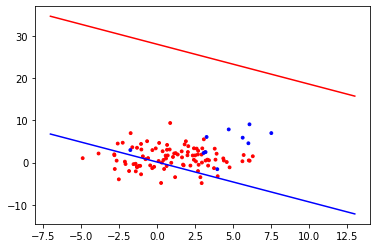

In [10]:
plot_least_squares_decision(7.0, -7, 13, 100, 10)

7. Discuss how the classification performance is affected by it.

When N2=10, the red decision line shifted far away from the red cluster, but the blue decision line is not far enough from the blue cluster. This means that while the classification will perform well in classifying the red points, it will not perform well in classifying the blue points. The blue points which are far from the red decision line and close to the blue decision line will be incorrectly classified as red points.

8. Set sigma=4.0 and N1=N2=100. Change tn to {-1, +1} and draw the decision.

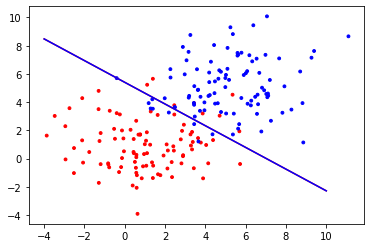

In [11]:
plot_least_squares_decision(4.0, -4, 10, 100, 100, -1, 1)

9. Set tn back to {0, 1}, sigma=1.0. Modify the code for generating the data so that it includes outliers as shown below.

In [12]:
def plot_least_squares_outlier(sigma, x_min, x_max, N1=100, N2=100, t1=0, t2=1):
    cov = [[sigma, 0], [0, sigma]]
    
    mean = (1, 1)
    X1 = np.random.multivariate_normal(mean, cov, N1)
    c1 = ['red'] * N1

    mean = (5, 5)
    X2 = np.random.multivariate_normal(mean, cov, N2)
    c2 = ['blue'] * N2
    
    mean = (20, 20)
    X3 = np.random.multivariate_normal(mean, cov, 100)

    X = np.concatenate((X1, X2, X3))
    color = np.concatenate((c1, c2, c2))
    
    # Create a NxK label matrix
    T = np.matrix([[t2, t1] for _ in range(N1)] + \
                  [[t1, t2] for _ in range(N2)] + \
                  [[t1, t2] for _ in range(100)])
    
    # Get W 
    W = least_squares(np.matrix(X), T)
    
    # Get decision lines from W
    x_arr, y_red, y_blue = get_decision_lines(W, x_min, x_max)
    
    fig = plt.figure()
    fig.suptitle("tn = ({}, {})".format(t1, t2))
    ax = fig.add_subplot(111)

    ax.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
    ax.plot(x_arr, y_red, color="red")
    ax.plot(x_arr, y_blue, color="blue")

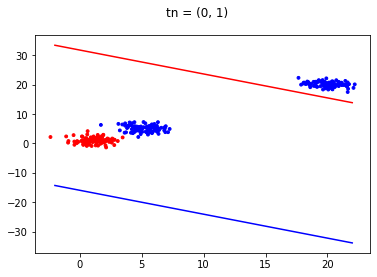

In [13]:
plot_least_squares_outlier(1, -2 , 22)

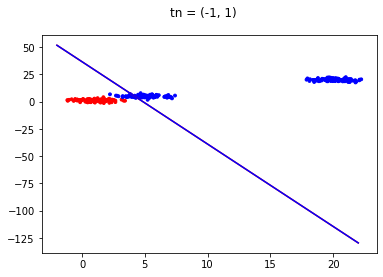

In [14]:
plot_least_squares_outlier(1, -2, 22, 100, 100, -1, 1)

11. Explain what's wrong with the lines.

Because of the outliers, when tn = (0, 1), we can see the original blue points are almost equal-distance from the red and blue decision line. This means that some of these blue points will be incorrectly classified as red points. When tn = (-1, 1), we see that many of the blue points lie on the decision lines. Since tn = (-1, 1), the points lying on the decision lines will not be classified.

12. Generate data, similar to the figure below (where the red population is 10 and blue's population is 200; the first principal axis of red is vertical and the first principal axis of blue is horizontal).

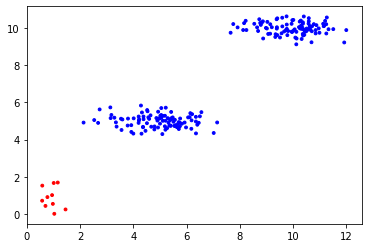

In [15]:
N1 = 10
N2 = 100
N3 = 100

mean = (1, 1)
X1 = np.random.multivariate_normal(mean, [[0.1, 0], [0, 1]], N1)
c1 = ['red'] * N1

mean = (5, 5)
X2 = np.random.multivariate_normal(mean, [[1, 0], [0, 0.1]], N2)
c2 = ['blue'] * N2

mean = (10, 10)
X3 = np.random.multivariate_normal(mean, [[1, 0], [0, 0.1]], N3)
c3 = ['blue'] * N3

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
plt.show()

13. Compute matrix W, and draw the decision lines.

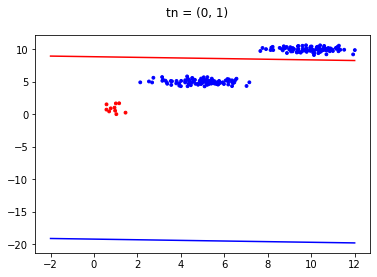

In [16]:
# Create a NxK label matrix
T = np.matrix([[1, 0] for _ in range(10)] + \
              [[0, 1] for _ in range(100)] + \
              [[0, 1] for _ in range(100)])

T = T.astype(int)

# Get W 
W = least_squares(np.matrix(X), T)

# Get decision lines from W
x_arr, y_red, y_blue = get_decision_lines(W, -2, 12)

fig = plt.figure()
fig.suptitle("tn = ({}, {})".format(0, 1))
ax = fig.add_subplot(111)

ax.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
ax.plot(x_arr, y_red, color="red")
ax.plot(x_arr, y_blue, color="blue")

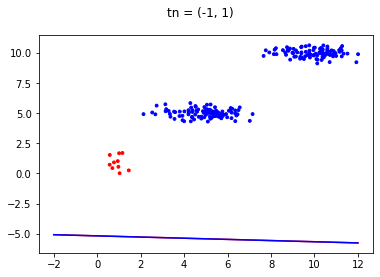

In [17]:
# Create a NxK label matrix
T = np.matrix([[1, -1] for _ in range(10)] + \
              [[-1, 1] for _ in range(100)] + \
              [[-1, 1] for _ in range(100)])

T = T.astype(int)

# Get W 
W = least_squares(np.matrix(X), T)

# Get decision lines from W
x_arr, y_red, y_blue = get_decision_lines(W, -2, 12)

fig = plt.figure()
fig.suptitle("tn = ({}, {})".format(-1, 1))
ax = fig.add_subplot(111)

ax.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
ax.plot(x_arr, y_red, color="red")
ax.plot(x_arr, y_blue, color="blue")

14. Discuss why the lines are in wrong positions.

In this set up, the presence of outliers in the blue class, and the class imbalance, where there are 10 points in the red class and 200 points in the blue class cause the lines to be in wrong positions. The least square algorithm aims to minimize the sum of squared errors, hence with the class imbalance and outliers, the algorithm produced lines that can fit most of the data, and in this case it was the blue points.

15. Write code to generate 3 classes, where the means of the 3 clusters are located at (1, 5), (5, 10) and (10, 5). Set sigma=1. Display the result.

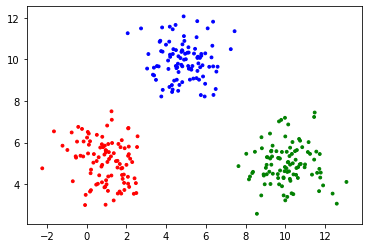

In [18]:
N1 = 100
N2 = 100
N3 = 100

sigma = 1.0
cov = [[sigma, 0], [0, sigma]]

mean = (1, 5)
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * N1

mean = (5, 10)
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * N2

mean = (10, 5)
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['green'] * N3

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
plt.show()

In [19]:
def plot_least_squares_three_class(m1=(1,5), m2=(5,10), m3=(10,5)):
    sigma = 1.0
    cov = [[sigma, 0], [0, sigma]]
    
    X1 = np.random.multivariate_normal(m1, cov, 100)
    c1 = ['red'] * 100

    X2 = np.random.multivariate_normal(m2, cov, 100)
    c2 = ['blue'] * 100

    X3 = np.random.multivariate_normal(m3, cov, 100)
    c3 = ['green'] * 100

    X = np.concatenate((X1, X2, X3))
    color = np.concatenate((c1, c2, c3))

    # Create a NxK label matrix
    T = np.array([[1, 0, 0] for _ in range(100)] + \
                   [[0, 1, 0] for _ in range(100)] + \
                   [[0, 0, 1] for _ in range(100)])
        
    # Get W 
    W = least_squares(np.matrix(X), T)
    def get_y_arr(x_arr, w):
        y_arr = -(w[1]*x_arr/w[2]) - (w[0]/w[2])    
        return y_arr
    
    x_arr = np.linspace(-1, 12, 10)
    y_red = get_y_arr(x_arr, W[:, 0].A1)
    y_blue = get_y_arr(x_arr, W[:, 1].A1)
    y_green = get_y_arr(x_arr, W[:, 2].A1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
    ax.plot(x_arr, y_red, color="red")
    ax.plot(x_arr, y_blue, color="blue")
    ax.plot(x_arr, y_green, color="green")
    

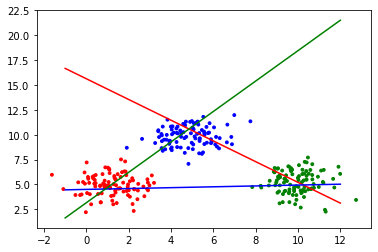

In [20]:
plot_least_squares_three_class()

17. Change the means to (1,5), (5,10), (10,15), and draw the decision lines.

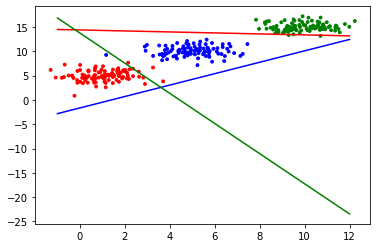

In [21]:
plot_least_squares_three_class((1,5), (5,10), (10,15))

18. Concerning the decision lines, discuss what you observe.

Since we used the 1-of-K encoding scheme, the least squares algorithm produced lines where the decision line would 1) try to pass through all the points outside of the class (t=0) and 2) be at a distance 1 (t=1) from the points in the class. We observe that for the red decision line passes through the middle of the blue and green cluster, as that would best fit criterion 1 and 2. We observe the optimization for the green decision line which passes through the middle of the red and blue cluster. However, the blue decision line cannot correctly satisfy criterion 1 and 2 properly since the blue cluster in right in-between the other two classes, hence decision line is optimized to be parallel to all three clusters.

# Part 2: Predictive Distribution 

1. Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2.

2. Generate data.

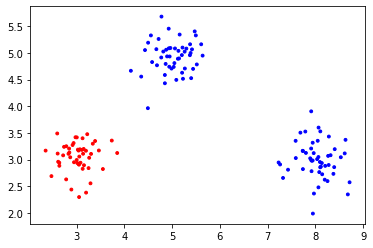

In [228]:
sigma = 0.1
cov = [[sigma, 0], [0, sigma]]
    
mean = (3, 3)
X1 = np.random.multivariate_normal(mean, cov, 50)
c1 = ['red'] * 50

mean = (5, 5)
X2 = np.random.multivariate_normal(mean, cov, 50)
c2 = ['blue'] * 50

mean = (8, 3)
X3 = np.random.multivariate_normal(mean, cov, 50)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c2))

# Generate Nx1 label matrix
tbar = np.matrix([0]*50 + [1]*100).T

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
plt.show()

In [166]:
# Functions to compute w_map
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def get_wmap(X, tbar, m, S):
    
    # Initialise w
    w = np.matrix([0, 0, 0]).T
    cov_q = 0;
    
    sum_change = 999
    while sum_change > 1e-4:
        w_old = w
        
        sigbar = sigmoid(X*w_old)

        nabla_E = (np.linalg.inv(S) * (w_old - m)) + (X.T * (sigbar - tbar))

        R = np.diag(np.asarray((sigbar * (1-sigbar).T).T)[0])

        H = np.linalg.inv(S) + (X.T * R * X)
        H_inv = np.linalg.inv(H)
        w_new = w_old - (H_inv * nabla_E)
        
        # Update variables
        w = w_new
        cov_q = H_inv
        
        sum_change = abs(sum(w_new-w_old))
        
    return w, cov_q

In [167]:
# Variables to compute w_map
X_dummy = np.matrix(np.insert(X, 0, 1, axis=1))
m = np.zeros((3, 1))
S = np.diag([20, 20, 20])

In [168]:
w_map, cov_q = get_wmap(X_dummy, tbar, m, S)

In [175]:
w_map

matrix([[-14.0775836 ],
        [  1.96614341],
        [  1.5951336 ]])

In [257]:
cov_q_v = np.matrix([[4.84404415, -0.46632884, -0.72303676],
 [-0.46632884,  0.41269745, -0.30681035],
 [-0.72303676, -0.30681035,  0.51169732]])
cov_q_v

matrix([[ 4.84404415, -0.46632884, -0.72303676],
        [-0.46632884,  0.41269745, -0.30681035],
        [-0.72303676, -0.30681035,  0.51169732]])

In [174]:
w_map.T * np.matrix([[1, 1, 1]]).T

matrix([[-10.51630659]])

In [184]:
# Function to compute predictive distribution
def get_prob_blue(x, w, cov_q):
    a_map = w.T * x.T
    sigma_star = x * cov_q * x.T
    prob = sigmoid(a_map / np.power(1 + sigma_star*np.pi/8, 1/2))
    
    return prob

In [258]:
get_prob_blue(np.matrix([[1, 10, 8]]), w_map, cov_q_v)

matrix([[0.99982684]])

3. Based in the generated data, compute the probability map.

In [259]:
# Prepare values for image
# X_all = np.matrix([[ for x1 in np.linspace(0, 10, 300) for x2 in np.linspace(0, 10, 300)]])
# X_all.shape

Z = np.zeros((50, 50))
for col, x1 in enumerate(np.linspace(0, 10, 50)):
    for row, x2 in enumerate(np.linspace(0, 10, 50)):
        Z[row, col] = get_prob_blue(np.matrix([[1, x1, x2]]), w_map, cov_q_v)

In [260]:
Z

array([[2.57705771e-04, 2.96363295e-04, 3.48262705e-04, ...,
        7.79782764e-01, 7.93170635e-01, 8.05457926e-01],
       [2.67488476e-04, 3.03438866e-04, 3.51977484e-04, ...,
        7.98781924e-01, 8.11189464e-01, 8.22538052e-01],
       [2.84312633e-04, 3.17927138e-04, 3.63646458e-04, ...,
        8.17216628e-01, 8.28613439e-01, 8.39003893e-01],
       ...,
       [5.75961775e-01, 6.01992694e-01, 6.28330237e-01, ...,
        9.99853965e-01, 9.99867198e-01, 9.99877736e-01],
       [5.93811282e-01, 6.19227660e-01, 6.44830561e-01, ...,
        9.99849269e-01, 9.99864038e-01, 9.99875881e-01],
       [6.10701532e-01, 6.35465953e-01, 6.60310895e-01, ...,
        9.99843062e-01, 9.99859487e-01, 9.99872727e-01]])

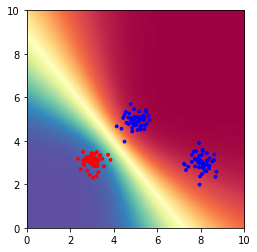

In [261]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color, s=8)
plt.imshow(Z, interpolation='bilinear', origin='lower', cmap='Spectral_r',
           extent=[0,10,0,10])